# Prepare

In [1]:
from nptdms import TdmsFile
import numpy as np
import pandas as pd

In [2]:
#振动
tdms20190513_01_01 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100515.tdms')
tdms20190513_01_02 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100615.tdms')
tdms20190513_01_03 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100715.tdms')
tdms20190513_01_04 = TdmsFile(r'D:\data\20190513\01\Acc 05-13-19 时间 100816.tdms')

#02组
tdms20190513_02_01 = TdmsFile(r'D:\data\20190513\02\Acc 05-13-19 时间 102244.tdms')

#03组
tdms20190513_03_01 = TdmsFile(r'D:\data\20190513\03\Acc 05-13-19 时间 110218.tdms')

In [3]:
def TDMS_Vibration(tdmsfile):

    group_name = 'Measured Data'
    
    M=[None] * 6
    
    channel_x_0 = tdmsfile.object(group_name, 'x_0')
    channel_y_0 = tdmsfile.object(group_name, 'y_0')
    channel_z_0 = tdmsfile.object(group_name, 'z_0')
    channel_x_1 = tdmsfile.object(group_name, 'x_1')
    channel_y_1 = tdmsfile.object(group_name, 'y_1')
    channel_z_1 = tdmsfile.object(group_name, 'z_1')

    M[0] = channel_x_0.data
    M[1] = channel_x_0.data
    M[2] = channel_x_0.data
    M[3] = channel_x_1.data
    M[4] = channel_x_1.data
    M[5] = channel_x_1.data
    
   # M = np.transpose(M)
    
    return M

In [4]:
#读取每次的振动数据
vibration_20190153_01_01 = TDMS_Vibration(tdms20190513_01_01)
vibration_20190153_01_02 = TDMS_Vibration(tdms20190513_01_02)
vibration_20190153_01_03 = TDMS_Vibration(tdms20190513_01_03)
vibration_20190153_01_04 = TDMS_Vibration(tdms20190513_01_04)

vibration_20190153_02 = TDMS_Vibration(tdms20190513_02_01)

vibration_20190153_03 = TDMS_Vibration(tdms20190513_03_01)

In [5]:
#合并单次的数据
vibration_20190153_01 = np.concatenate((vibration_20190153_01_01, vibration_20190153_01_02, 
                                        vibration_20190153_01_03, vibration_20190153_01_04), axis = 1)

In [6]:
def Vibration_np_2_pd(data):
    column_name = ['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1']
    np_data = np.transpose(data)
    pd_data = pd.DataFrame(np_data, columns = column_name)
    
def Power_np_2_pd(data):
    column_name = ['power']
    np_data = np.transpose(data)
    pd_data = pd.DataFrame(np_data, columns = column_name)

In [7]:
vibration_20190153_01_pd = Vibration_np_2_pd(vibration_20190153_01)
vibration_20190153_02_pd = Vibration_np_2_pd(vibration_20190153_02)
vibration_20190153_03_pd = Vibration_np_2_pd(vibration_20190153_03)

# class EEMD

### def DoFFT

In [12]:
from scipy import fftpack
def DoFFT(data, freq):
    n = len(data)
    yf = 2* abs(np.fft.fft(data)) / n
    xf = fftpack.rfftfreq(n, d=1/freq)*2
    return xf, yf

### def DoEEMD

In [13]:
from PyEMD import EEMD
def DoEEMD(data, start, stop, freq, extrema_detection="parabol"):
    num = stop - start
    t = np.linspace(0, num/freq, num)
    
    eemd = EEMD()
    #eemd.FIE=XE_H = 10#设置停止条件
    emd = eemd.EMD
    emd.extrema_detection = extrema_detection
    
    eIMFs = eemd.eemd(data[start : stop], t)
    nIMFs = eIMFs.shape[0]
    
    return nIMFs, eIMFs

### def Do_imf_FFT

In [14]:
def Do_imf_FFT(data, imf_num = 6, freq = 1000):
    imf_FFT = [None] * imf_num
    for i in range(imf_num):
        xf_i = DoFFT(data[i], freq)[0]
        yf_i = DoFFT(data[i], freq)[1]
        imf_FFT[i] = yf_i
    
    return xf_i, imf_FFT

### def Draw_EEMD_Original_FFT_Compare

In [15]:
def Draw_EEMD_Original_FFT_Compare(data_1, nIMFs_1, eIMFs_1, freq_1, start_1, stop_1 , 
                                   data_2, nIMFs_2, eIMFs_2, freq_2, start_2, stop_2 , 
                                   colour_11 = 'navy', colour_12 = 'dodgerblue',  colour_21 = 'red', colour_22 = 'deeppink', size = (16, 16), alpha_num = 0.6):
    num_1 = stop_1 - start_1
    t_1 = np.linspace(0, num_1/freq_1, num_1)
    num_2 = stop_2 - start_2
    t_2 = np.linspace(0, num_2/freq_2, num_2)
    
    plt.figure(figsize=size)
    plt.subplot(nIMFs_1+1, 2, 1)
    plt.plot(t_1, data_1[start_1: stop_1],  colour_11, alpha = alpha_num)
    plt.plot(t_2, data_2[start_2: stop_2],  colour_21, alpha = alpha_num)
    
    plt.subplot(nIMFs_1+1, 2, 2)
    plt.plot(DoFFT(data_1[start_1 : stop_1], freq_1)[0], DoFFT(data_1[start_1 : stop_1], freq_1)[1],  colour_11, alpha = alpha_num)
    plt.plot(DoFFT(data_2[start_2 : stop_2], freq_2)[0], DoFFT(data_2[start_2 : stop_2], freq_2)[1],  colour_21, alpha = alpha_num)
    plt.xlim(0, freq_1/2)

    for n in range(nIMFs_1):
        if n < 100:#不局限于10
            plt.subplot(nIMFs_1+1, 2, (n+1)*2+1)
            plt.plot(t_1, eIMFs_1[n], colour_12, alpha = alpha_num)
            plt.plot(t_2, eIMFs_2[n], colour_22, alpha = alpha_num)
            plt.ylabel("eIMF %i" %(n+1))
            plt.locator_params(axis='y', nbins=5)

            plt.subplot(nIMFs_1+1, 2, (n+1)*2+2)
            plt.plot(DoFFT(eIMFs_1[n], freq_1)[0], DoFFT(eIMFs_1[n], freq_1)[1], colour_12, alpha = alpha_num)
            plt.plot(DoFFT(eIMFs_2[n], freq_2)[0], DoFFT(eIMFs_2[n], freq_2)[1], colour_22, alpha = alpha_num)
            plt.ylabel("eIMF %i" %(n+1))
            plt.locator_params(axis='y', nbins=5)
            plt.xlim(0, freq_1/2)
        else:
            continue

    plt.xlabel("Time [s]")
    plt.tight_layout()
    plt.savefig('eemd_example', dpi=120)
    plt.show()

## 计算

### 选择数据

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
start_num = [None] * 6
stop_num = [None] * 6

for i in range (6):
    
    start_num[0] = 300000
    
    start_num[1] = 500000
    start_num[2] = 1000000
    start_num[3] = 36000000
    
    start_num[4] = 1000000
    start_num[5] = 33000000
    stop_num[i] = start_num[i] + 10000

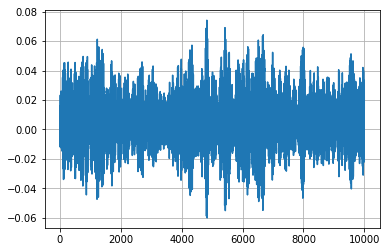

In [131]:
plt.plot(figsize=(16, 4))
#plt.plot(vibration_20190153_01[5][start_num[0]: stop_num[0]])
#plt.plot(vibration_20190153_02[5][start_num[1]: stop_num[1]])
#plt.plot(vibration_20190153_02[5][start_num[1]: stop_num[1]])
plt.plot(vibration_20190153_02[5][36000000: 36010000])
#plt.plot(vibration_20190153_02[1])
#plt.xlim(200000, 250000)
plt.grid()
#plt.ylim(-0.1, 0.1)

### 进行EEMD

#### x_0的EEMD计算

#0-5
Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[0], 
                                   nIMFs_1 = vibration_data_EEMD_x_0_0101[0], 
                                   eIMFs_1 = vibration_data_EEMD_x_0_0101[1], 
                                   freq_1 = 1000, 
                                   start_1 = start_num[0], 
                                   stop_1 = stop_num[0], 
                               
                                   data_2 = vibration_20190153_03[0], 
                                   nIMFs_2 = vibration_data_EEMD_x_0_0302[0], 
                                   eIMFs_2 = vibration_data_EEMD_x_0_0302[1], 
                                   freq_2 = 1000, 
                                   start_2 = start_num[5], 
                                   stop_2 = stop_num[5])

#0-3
Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[0], 
                                   nIMFs_1 = vibration_data_EEMD_x_0_0101[0], 
                                   eIMFs_1 = vibration_data_EEMD_x_0_0101[1], 
                                   freq_1 = 1000, 
                                   start_1 = start_num[0], 
                                   stop_1 = stop_num[0], 
                               
                                   data_2 = vibration_20190153_02[0], 
                                   nIMFs_2 = vibration_data_EEMD_x_0_0203[0], 
                                   eIMFs_2 = vibration_data_EEMD_x_0_0203[1], 
                                   freq_2 = 1000, 
                                   start_2 = start_num[3], 
                                   stop_2 = stop_num[3])

#3-5
Draw_EEMD_Original_FFT_Compare(
                               data_1 = vibration_20190153_02[0], 
                               nIMFs_1 = vibration_data_EEMD_x_0_0203[0], 
                               eIMFs_1 = vibration_data_EEMD_x_0_0203[1], 
                               freq_1 = 1000, 
                               start_1 = start_num[3], 
                               stop_1 = stop_num[3],
                               
                               data_2 = vibration_20190153_03[0], 
                               nIMFs_2 = vibration_data_EEMD_x_0_0302[0], 
                               eIMFs_2 = vibration_data_EEMD_x_0_0302[1], 
                               freq_2 = 1000, 
                               start_2 = start_num[5], 
                               stop_2 = stop_num[5])

#### y_0的EEMD计算

#0-5
Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[1], 
                                   nIMFs_1 = vibration_data_EEMD_y_0_0101[0], 
                                   eIMFs_1 = vibration_data_EEMD_y_0_0101[1], 
                                   freq_1 = 1000, 
                                   start_1 = start_num[0], 
                                   stop_1 = stop_num[0], 
                               
                                   data_2 = vibration_20190153_03[1], 
                                   nIMFs_2 = vibration_data_EEMD_y_0_0302[0], 
                                   eIMFs_2 = vibration_data_EEMD_y_0_0302[1], 
                                   freq_2 = 1000, 
                                   start_2 = start_num[5], 
                                   stop_2 = stop_num[5])

#0-3
Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[1], 
                                   nIMFs_1 = vibration_data_EEMD_y_0_0101[0], 
                                   eIMFs_1 = vibration_data_EEMD_y_0_0101[1], 
                                   freq_1 = 1000, 
                                   start_1 = start_num[0], 
                                   stop_1 = stop_num[0], 
                               
                                   data_2 = vibration_20190153_02[1], 
                                   nIMFs_2 = vibration_data_EEMD_y_0_0203[0], 
                                   eIMFs_2 = vibration_data_EEMD_y_0_0203[1], 
                                   freq_2 = 1000, 
                                   start_2 = start_num[3], 
                                   stop_2 = stop_num[3])

#3-5
Draw_EEMD_Original_FFT_Compare(
                               data_1 = vibration_20190153_02[1], 
                               nIMFs_1 = vibration_data_EEMD_y_0_0203[0], 
                               eIMFs_1 = vibration_data_EEMD_y_0_0203[1], 
                               freq_1 = 1000, 
                               start_1 = start_num[3], 
                               stop_1 = stop_num[3],
                               
                               data_2 = vibration_20190153_03[1], 
                               nIMFs_2 = vibration_data_EEMD_y_0_0302[0], 
                               eIMFs_2 = vibration_data_EEMD_y_0_0302[1], 
                               freq_2 = 1000, 
                               start_2 = start_num[5], 
                               stop_2 = stop_num[5])

#### x_1的EEMD计算

In [166]:
#x_1
vibration_data_EEMD_x_1_0101 = DoEEMD(vibration_20190153_01[3], start_num[0], stop_num[0], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_x_1_0201 = DoEEMD(vibration_20190153_02[3], start_num[1], stop_num[1], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_x_1_0202 = DoEEMD(vibration_20190153_02[3], start_num[2], stop_num[2], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_x_1_0203 = DoEEMD(vibration_20190153_02[3], start_num[3], stop_num[3], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_x_1_0301 = DoEEMD(vibration_20190153_03[3], start_num[4], stop_num[4], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_x_1_0302 = DoEEMD(vibration_20190153_03[3], start_num[5], stop_num[5], freq = 1000, extrema_detection="parabol")

#0-5
Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[3], 
                                   nIMFs_1 = vibration_data_EEMD_x_1_0101[0], 
                                   eIMFs_1 = vibration_data_EEMD_x_1_0101[1], 
                                   freq_1 = 1000, 
                                   start_1 = start_num[0], 
                                   stop_1 = stop_num[0], 
                               
                                   data_2 = vibration_20190153_03[3], 
                                   nIMFs_2 = vibration_data_EEMD_x_1_0302[0], 
                                   eIMFs_2 = vibration_data_EEMD_x_1_0302[1], 
                                   freq_2 = 1000, 
                                   start_2 = start_num[5], 
                                   stop_2 = stop_num[5])

#0-3 Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[0], nIMFs_1 = vibration_data_EEMD_x_0_0101[0], eIMFs_1 = vibration_data_EEMD_x_0_0101[1], freq_1 = 1000, start_1 = start_num[0], stop_1 = stop_num[0],

                               data_2 = vibration_20190153_02[0], 
                               nIMFs_2 = vibration_data_EEMD_x_0_0203[0], 
                               eIMFs_2 = vibration_data_EEMD_x_0_0203[1], 
                               freq_2 = 1000, 
                               start_2 = start_num[3], 
                               stop_2 = stop_num[3])

#0-3
Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[3], 
                                   nIMFs_1 = vibration_data_EEMD_x_1_0101[0], 
                                   eIMFs_1 = vibration_data_EEMD_x_1_0101[1], 
                                   freq_1 = 1000, 
                                   start_1 = start_num[0], 
                                   stop_1 = stop_num[0], 
                               
                                   data_2 = vibration_20190153_02[3], 
                                   nIMFs_2 = vibration_data_EEMD_x_1_0203[0], 
                                   eIMFs_2 = vibration_data_EEMD_x_1_0203[1], 
                                   freq_2 = 1000, 
                                   start_2 = start_num[3], 
                                   stop_2 = stop_num[3])

#3-5
Draw_EEMD_Original_FFT_Compare(
                               data_1 = vibration_20190153_02[3], 
                               nIMFs_1 = vibration_data_EEMD_x_1_0203[0], 
                               eIMFs_1 = vibration_data_EEMD_x_1_0203[1], 
                               freq_1 = 1000, 
                               start_1 = start_num[3], 
                               stop_1 = stop_num[3],
                               
                               data_2 = vibration_20190153_03[3], 
                               nIMFs_2 = vibration_data_EEMD_x_1_0302[0], 
                               eIMFs_2 = vibration_data_EEMD_x_1_0302[1], 
                               freq_2 = 1000, 
                               start_2 = start_num[5], 
                               stop_2 = stop_num[5])

#### y_1的EEMD计算

In [13]:
#y_1
vibration_data_EEMD_y_1_0101 = DoEEMD(vibration_20190153_01[4], start_num[0], stop_num[0], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_y_1_0201 = DoEEMD(vibration_20190153_02[4], start_num[1], stop_num[1], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_y_1_0202 = DoEEMD(vibration_20190153_02[4], start_num[2], stop_num[2], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_y_1_0203 = DoEEMD(vibration_20190153_02[4], start_num[3], stop_num[3], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_y_1_0301 = DoEEMD(vibration_20190153_03[4], start_num[4], stop_num[4], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_y_1_0302 = DoEEMD(vibration_20190153_03[4], start_num[5], stop_num[5], freq = 1000, extrema_detection="parabol")

#0-5
Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[4], 
                                   nIMFs_1 = vibration_data_EEMD_y_1_0101[0], 
                                   eIMFs_1 = vibration_data_EEMD_y_1_0101[1], 
                                   freq_1 = 1000, 
                                   start_1 = start_num[0], 
                                   stop_1 = stop_num[0], 
                               
                                   data_2 = vibration_20190153_03[4], 
                                   nIMFs_2 = vibration_data_EEMD_y_1_0302[0], 
                                   eIMFs_2 = vibration_data_EEMD_y_1_0302[1], 
                                   freq_2 = 1000, 
                                   start_2 = start_num[5], 
                                   stop_2 = stop_num[5])

#0-3
Draw_EEMD_Original_FFT_Compare(data_1 = vibration_20190153_01[4], 
                                   nIMFs_1 = vibration_data_EEMD_y_1_0101[0], 
                                   eIMFs_1 = vibration_data_EEMD_y_1_0101[1], 
                                   freq_1 = 1000, 
                                   start_1 = start_num[0], 
                                   stop_1 = stop_num[0], 
                               
                                   data_2 = vibration_20190153_02[4], 
                                   nIMFs_2 = vibration_data_EEMD_y_1_0203[0], 
                                   eIMFs_2 = vibration_data_EEMD_y_1_0203[1], 
                                   freq_2 = 1000, 
                                   start_2 = start_num[3], 
                                   stop_2 = stop_num[3])

#3-5
Draw_EEMD_Original_FFT_Compare(
                               data_1 = vibration_20190153_02[4], 
                               nIMFs_1 = vibration_data_EEMD_y_1_0203[0], 
                               eIMFs_1 = vibration_data_EEMD_y_1_0203[1], 
                               freq_1 = 1000, 
                               start_1 = start_num[3], 
                               stop_1 = stop_num[3],
                               
                               data_2 = vibration_20190153_03[4], 
                               nIMFs_2 = vibration_data_EEMD_y_1_0302[0], 
                               eIMFs_2 = vibration_data_EEMD_y_1_0302[1], 
                               freq_2 = 1000, 
                               start_2 = start_num[5], 
                               stop_2 = stop_num[5])

#### z_1的EEMD计算

In [173]:
#z_1
vibration_data_EEMD_z_1_0101 = DoEEMD(vibration_20190153_01[4], start_num[0], stop_num[0], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_z_1_0201 = DoEEMD(vibration_20190153_02[4], start_num[1], stop_num[1], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_z_1_0202 = DoEEMD(vibration_20190153_02[4], start_num[2], stop_num[2], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_z_1_0203 = DoEEMD(vibration_20190153_02[4], start_num[3], stop_num[3], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_z_1_0301 = DoEEMD(vibration_20190153_03[4], start_num[4], stop_num[4], freq = 1000, extrema_detection="parabol")
vibration_data_EEMD_z_1_0302 = DoEEMD(vibration_20190153_03[4], start_num[5], stop_num[5], freq = 1000, extrema_detection="parabol")

### 数据拼接

#### x_1的IMF数据合并

#### y_1的IMF数据合并

#### z_1的IMF数据合并

In [176]:
imf_1_z_1 = [None] * 6
imf_1_z_1[0] = vibration_data_EEMD_z_1_0101[1][0]
imf_1_z_1[1] = vibration_data_EEMD_z_1_0201[1][0]
imf_1_z_1[2] = vibration_data_EEMD_z_1_0202[1][0]
imf_1_z_1[3] = vibration_data_EEMD_z_1_0203[1][0]
imf_1_z_1[4] = vibration_data_EEMD_z_1_0301[1][0]
imf_1_z_1[5] = vibration_data_EEMD_z_1_0302[1][0]

imf_2_z_1 = [None] * 6
imf_2_z_1[0] = vibration_data_EEMD_z_1_0101[1][1]
imf_2_z_1[1] = vibration_data_EEMD_z_1_0201[1][1]
imf_2_z_1[2] = vibration_data_EEMD_z_1_0202[1][1]
imf_2_z_1[3] = vibration_data_EEMD_z_1_0203[1][1]
imf_2_z_1[4] = vibration_data_EEMD_z_1_0301[1][1]
imf_2_z_1[5] = vibration_data_EEMD_z_1_0302[1][1]

imf_3_z_1 = [None] * 6
imf_3_z_1[0] = vibration_data_EEMD_z_1_0101[1][2]
imf_3_z_1[1] = vibration_data_EEMD_z_1_0201[1][2]
imf_3_z_1[2] = vibration_data_EEMD_z_1_0202[1][2]
imf_3_z_1[3] = vibration_data_EEMD_z_1_0203[1][2]
imf_3_z_1[4] = vibration_data_EEMD_z_1_0301[1][2]
imf_3_z_1[5] = vibration_data_EEMD_z_1_0302[1][2]

imf_4_z_1 = [None] * 6
imf_4_z_1[0] = vibration_data_EEMD_z_1_0101[1][3]
imf_4_z_1[1] = vibration_data_EEMD_z_1_0201[1][3]
imf_4_z_1[2] = vibration_data_EEMD_z_1_0202[1][3]
imf_4_z_1[3] = vibration_data_EEMD_z_1_0203[1][3]
imf_4_z_1[4] = vibration_data_EEMD_z_1_0301[1][3]
imf_4_z_1[5] = vibration_data_EEMD_z_1_0302[1][3]

imf_5_z_1 = [None] * 6
imf_5_z_1[0] = vibration_data_EEMD_z_1_0101[1][4]
imf_5_z_1[1] = vibration_data_EEMD_z_1_0201[1][4]
imf_5_z_1[2] = vibration_data_EEMD_z_1_0202[1][4]
imf_5_z_1[3] = vibration_data_EEMD_z_1_0203[1][4]
imf_5_z_1[4] = vibration_data_EEMD_z_1_0301[1][4]
imf_5_z_1[5] = vibration_data_EEMD_z_1_0302[1][4]

imf_6_z_1 = [None] * 6
imf_6_z_1[0] = vibration_data_EEMD_z_1_0101[1][5]
imf_6_z_1[1] = vibration_data_EEMD_z_1_0201[1][5]
imf_6_z_1[2] = vibration_data_EEMD_z_1_0202[1][5]
imf_6_z_1[3] = vibration_data_EEMD_z_1_0203[1][5]
imf_6_z_1[4] = vibration_data_EEMD_z_1_0301[1][5]
imf_6_z_1[5] = vibration_data_EEMD_z_1_0302[1][5]

### 存储

#### 存储数据

In [3]:
import pickle

In [172]:
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_1_x_1.pkl', 'wb') as f:
    pickle.dump(imf_1_x_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_2_x_1.pkl', 'wb') as f:
    pickle.dump(imf_2_x_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_3_x_1.pkl', 'wb') as f:
    pickle.dump(imf_3_x_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_4_x_1.pkl', 'wb') as f:
    pickle.dump(imf_4_x_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_5_x_1.pkl', 'wb') as f:
    pickle.dump(imf_5_x_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_6_x_1.pkl', 'wb') as f:
    pickle.dump(imf_6_x_1, f)

In [170]:
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_1_y_1.pkl', 'wb') as f:
    pickle.dump(imf_1_y_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_2_y_1.pkl', 'wb') as f:
    pickle.dump(imf_2_y_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_3_y_1.pkl', 'wb') as f:
    pickle.dump(imf_3_y_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_4_y_1.pkl', 'wb') as f:
    pickle.dump(imf_4_y_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_5_y_1.pkl', 'wb') as f:
    pickle.dump(imf_5_y_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_6_y_1.pkl', 'wb') as f:
    pickle.dump(imf_6_y_1, f)

In [177]:
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_1_z_1.pkl', 'wb') as f:
    pickle.dump(imf_1_z_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_2_z_1.pkl', 'wb') as f:
    pickle.dump(imf_2_z_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_3_z_1.pkl', 'wb') as f:
    pickle.dump(imf_3_z_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_4_z_1.pkl', 'wb') as f:
    pickle.dump(imf_4_z_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_5_z_1.pkl', 'wb') as f:
    pickle.dump(imf_5_z_1, f)
with open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_6_z_1.pkl', 'wb') as f:
    pickle.dump(imf_6_z_1, f)

#### 读取数据

In [7]:
imf_1_x_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_1_x_1.pkl', 'rb')
imf_2_x_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_2_x_1.pkl', 'rb')
imf_3_x_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_3_x_1.pkl', 'rb')
imf_4_x_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_4_x_1.pkl', 'rb')
imf_5_x_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_5_x_1.pkl', 'rb')
imf_6_x_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_6_x_1.pkl', 'rb')

imf_1_y_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_1_y_1.pkl', 'rb')
imf_2_y_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_2_y_1.pkl', 'rb')
imf_3_y_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_3_y_1.pkl', 'rb')
imf_4_y_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_4_y_1.pkl', 'rb')
imf_5_y_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_5_y_1.pkl', 'rb')
imf_6_y_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_6_y_1.pkl', 'rb')

imf_1_z_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_1_z_1.pkl', 'rb')
imf_2_z_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_2_z_1.pkl', 'rb')
imf_3_z_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_3_z_1.pkl', 'rb')
imf_4_z_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_4_z_1.pkl', 'rb')
imf_5_z_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_5_z_1.pkl', 'rb')
imf_6_z_1_pkl = open(r'D:\Jupyter Notebook\Learning_Python\2019_winter\python_data\imf_6_z_1.pkl', 'rb')

In [20]:
imf_1_x_1 = pickle.load(imf_1_x_1_pkl)
imf_2_x_1 = pickle.load(imf_2_x_1_pkl)
imf_3_x_1 = pickle.load(imf_3_x_1_pkl)
imf_4_x_1 = pickle.load(imf_4_x_1_pkl)
imf_5_x_1 = pickle.load(imf_5_x_1_pkl)
imf_6_x_1 = pickle.load(imf_6_x_1_pkl)

imf_1_y_1 = pickle.load(imf_1_y_1_pkl)
imf_2_y_1 = pickle.load(imf_2_y_1_pkl)
imf_3_y_1 = pickle.load(imf_3_y_1_pkl)
imf_4_y_1 = pickle.load(imf_4_y_1_pkl)
imf_5_y_1 = pickle.load(imf_5_y_1_pkl)
imf_6_y_1 = pickle.load(imf_6_y_1_pkl)

imf_1_z_1 = pickle.load(imf_1_z_1_pkl)
imf_2_z_1 = pickle.load(imf_2_z_1_pkl)
imf_3_z_1 = pickle.load(imf_3_z_1_pkl)
imf_4_z_1 = pickle.load(imf_4_z_1_pkl)
imf_5_z_1 = pickle.load(imf_5_z_1_pkl)
imf_6_z_1 = pickle.load(imf_6_z_1_pkl)

# 特征

rvs：随机变量

pdf：概率密度函数

cdf：累积分布函数

sf：生存功能（1-CDF）

ppf：百分点函数（CDF的反转）

isf：逆生存函数（SF的逆）

stats：返回均值，方差，（Fisher's）偏斜或（Fisher's）峰度

moment：分布的非中心时刻

## FFT

#### 计算每个imf的FFT

In [21]:
def Do_imf_FFT(data, imf_num = 6, freq = 1000):
    imf_FFT = [None] * imf_num
    for i in range(imf_num):
        xf_i = DoFFT(data[i], freq)[0]
        yf_i = DoFFT(data[i], freq)[1]
        imf_FFT[i] = yf_i
    
    return xf_i, imf_FFT

In [22]:
imf_FFT_timedomain = Do_imf_FFT(imf_1_y_1)[0]#获取FFT后的时域
imf_1_y_1_FFT = Do_imf_FFT(imf_1_y_1)[1]#获取每组数据的第一个imf分量的FFT后的频域值
imf_2_y_1_FFT = Do_imf_FFT(imf_2_y_1)[1]
imf_3_y_1_FFT = Do_imf_FFT(imf_3_y_1)[1]
imf_4_y_1_FFT = Do_imf_FFT(imf_4_y_1)[1]
#plt.plot(imf_1_y_1_FFT[2][0], imf_1_y_1_FFT[2][1])#画第二次数据的时频域图

## 时域特征值提取

In [23]:
from scipy import stats

### def Stats_Analysis

In [24]:
#均值和标准差
import math

def Stats_Analysis(data, count_number = 6):
    data_abs = np.abs(data)#绝对值
    
    data_num = [None] * count_number #每个数据包含的的点数
    data_max = [None] * count_number #最大值
    data_sqrt = [None] * count_number #根号

    data_energy = [None] * count_number #能量：数据绝对值之和表示能量
    
    data_mean = [None] * count_number#均值
    data_standard = [None] * count_number#标准差
    data_variance = [None] * count_number#方差
    
    data_rms=[None] * count_number#均方根
    
    data_skewness = [None] * count_number#偏度
    data_skewness_P = [None] * count_number#偏度服从正态分布的概率
    data_kurtosis = [None] * count_number#峰度
    data_kurtosis_P = [None] * count_number#峰度概率
    data_normality = [None] * count_number#正态性检验
    data_normality_P = [None] * count_number#正态性检验概率
    
    data_boxing = [None] * count_number#波形因子
    data_fengzhi = [None] * count_number#峰值因子
    data_maichong = [None] * count_number#脉冲因子
    data_yudu = [None] * count_number#裕度因子

    for i in range(6):
        data_num[i] = np.size(data[i])#每个数据包含的点数
        data_max[i] = max(data[i])#峰值
        data_sqrt= [[math.sqrt(data_abs[m][n]) for n in range(data_num[i])] for m in range(count_number)]#根号
        
        data_energy[i] = np.sum(np.abs(data[i][:])) #能量：数据绝对值之和表示能量
        data_mean[i], data_standard[i] = stats.norm.fit(data[i])
        data_variance[i] = data_standard[i] ** 2#方差
        data_rms[i] = math.sqrt(pow(data_mean[i],2) + pow(data_standard[i],2))#均方根
        
        data_skewness[i], data_skewness_P[i] = stats.skewtest(data[i])#偏度
        data_kurtosis[i], data_kurtosis_P[i] = stats.kurtosistest(data[i])#峰度
        data_normality[i], data_normality_P[i] = stats.normaltest(data[i])#正态性
        
        data_boxing[i]=data_rms[i] / (abs(data[i]).mean())#波形因子
        data_fengzhi[i] = data_max[i] / data_rms[i]#峰值因子
        data_maichong[i] = data_max[i] / abs(data_mean[i])#脉冲因子
        data_yudu[i]=data_max[i] / pow(sum(data_sqrt[i])/data_num[i],2)#裕度

    data_np = [data_max, data_energy, data_mean, data_standard, data_variance, data_rms, 
               data_skewness, data_skewness_P, data_kurtosis, data_kurtosis_P, data_normality, data_normality_P, 
              data_boxing, data_fengzhi, data_maichong, data_yudu]

    return data_np

### 时域的特征提取

#### y_1时域的特征计算

In [25]:
#时域的特征计算
Analysis_imf_1_y_1 = Stats_Analysis(imf_1_y_1)
index_name = ['峰值', '能量', '均值', '标准差', '方差', '均方根', '偏度', '偏度P', '峰度', 
              '峰度P', '正态性', '正态性P', 
              '波形因子', '峰值因子', '脉冲因子', '裕度']
column_name = ['No. 0', 'No. 1', 'No. 2', 'No. 3', 'No. 4', 'No. 5']
Analysis_imf_1_y_1_pd = pd.DataFrame(Analysis_imf_1_y_1,index = index_name, columns = column_name)
Analysis_imf_1_y_1_pd#.round(decimals=4)

,No. 0,No. 1,No. 2,No. 3,No. 4,No. 5
峰值,1.406622e-02,0.012744,7.972981e-03,1.516507e-02,1.217031e-02,1.288291e-02
能量,3.969238e+01,43.716815,2.210977e+01,3.926696e+01,3.185422e+01,3.160154e+01
均值,2.751038e-05,0.000049,2.055676e-05,1.060338e-05,-4.764782e-07,-1.181760e-05
标准差,4.773853e-03,0.004995,2.693310e-03,4.678868e-03,3.839565e-03,3.878504e-03
方差,2.278968e-05,0.000025,7.253919e-06,2.189181e-05,1.474226e-05,1.504279e-05
均方根,4.773933e-03,0.004995,2.693388e-03,4.678880e-03,3.839565e-03,3.878522e-03
偏度,-1.141965e+00,-2.718131,-4.088942e-01,9.058591e-02,1.677784e-01,-2.581863e-02
偏度P,2.534685e-01,0.006565,6.826173e-01,9.278216e-01,8.667576e-01,9.794020e-01
峰度,-2.114170e+01,-80.154655,-1.499892e+01,-2.781993e+01,-2.008479e+01,-1.021999e+01
峰度P,3.290350e-99,0.000000,7.462147e-51,2.490350e-170,1.002487e-89,1.613650e-24


#### 标准化

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

(-0.5, 0)

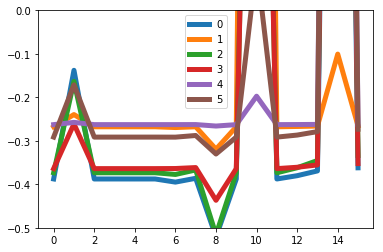

In [32]:
#标准化
from sklearn.preprocessing import StandardScaler
Analysis_imf_1_y_1_pd_scaled = StandardScaler().fit_transform(Analysis_imf_1_y_1_pd)#.reshape(-1, 1))
#plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_1_y_1_pd_scaled, lw = 5)
plt.legend(['0', '1', '2', '3', '4', '5'], loc = 'best')
plt.ylim(-0.5, 0)

(-0.001, 0.5)

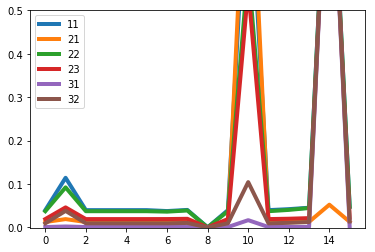

In [31]:
from sklearn.preprocessing import MinMaxScaler
Analysis_imf_1_y_1_pd_one = MinMaxScaler().fit_transform(Analysis_imf_1_y_1_pd)
#plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_1_y_1_pd_one, lw = 4)
plt.legend(['11', '21', '22', '23', '31', '32'], loc = 'best')
plt.ylim(-0.001, 0.5)

#### PCA

各主成分贡献度:[0.92955563 0.06980317]


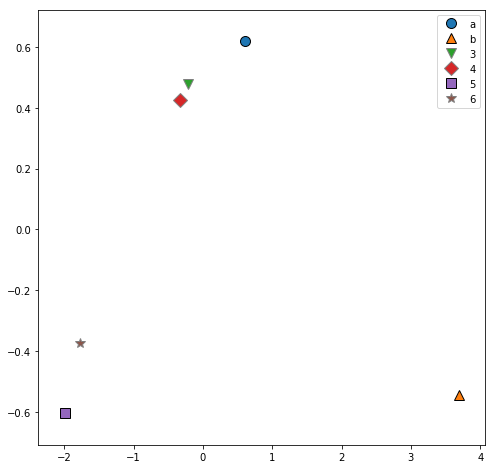

In [35]:
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components = 2)

pca_Analysis_imf_1_y_1_pd_scaled = pca.fit_transform(Analysis_imf_1_y_1_pd_scaled.T)

print('各主成分贡献度:{}'.format(pca.explained_variance_ratio_))

plt.figure(figsize = (8, 8))
target = [0, 1, 2, 3, 4, 5]
mglearn.discrete_scatter(pca_Analysis_imf_1_y_1_pd_scaled[ : , 0], pca_Analysis_imf_1_y_1_pd_scaled[:, 1],target )
#plt.legend(['new', 'normal', 'old'], loc = 'best')
plt.legend(['a', 'b', '3', '4', '5', '6'], loc = 'best')

### 频域的特征提取

#### 频域的特征计算

In [164]:
#频域的特征计算
Analysis_imf_1_y_1_FFT = Stats_Analysis(imf_1_y_1_FFT, count_number = 6)
index_name = ['峰值', '能量', '均值', '标准差（方差的根号）', '方差', '均方根', '偏度', '偏度P', '峰度', 
              '峰度P', '正态性', '正态性P', 
              '波形因子', '峰值因子', '脉冲因子', '裕度']
Analysis_imf_1_y_1_FFT_pd = pd.DataFrame(Analysis_imf_1_y_1_FFT,index = index_name)
Analysis_imf_1_y_1_FFT_pd.head()

,0,1,2,3,4,5
峰值,4.675535e-03,5.906652e-03,7.674634e-04,4.767888e-03,3.052624e-03,8.393114e-04
能量,5.632874e-01,4.367016e-01,4.128718e-01,5.287585e-01,5.121796e-01,6.172490e-01
均值,5.632874e-05,4.367016e-05,4.128718e-05,5.287585e-05,5.121796e-05,6.172490e-05
标准差（方差的根号）,7.709245e-05,8.984449e-05,3.459921e-05,7.720695e-05,5.721559e-05,4.698095e-05
方差,5.943247e-09,8.072032e-09,1.197105e-09,5.960913e-09,3.273623e-09,2.207210e-09


#### 标准化

Text(0.5, 1.0, 'The Feature of y_1')

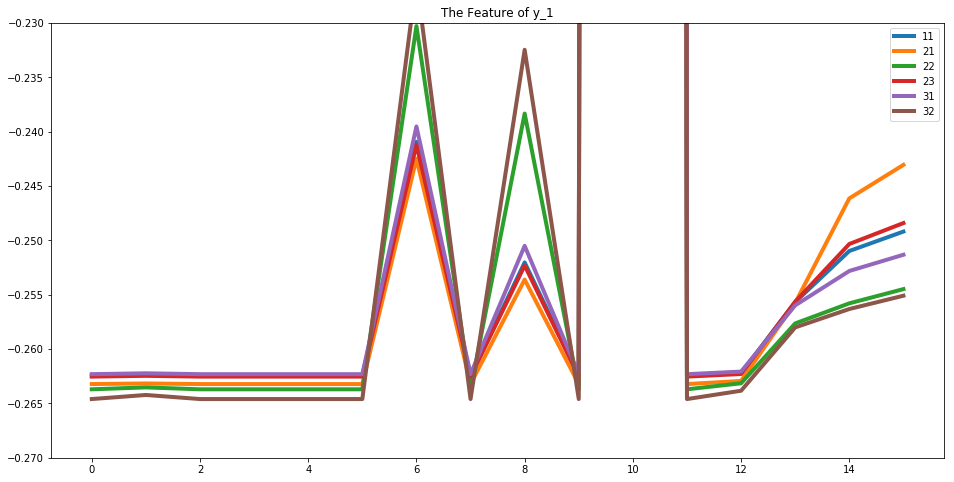

In [220]:
#标准化
from sklearn.preprocessing import StandardScaler
Analysis_imf_1_y_1_pd_FFT_scaled = StandardScaler().fit_transform(Analysis_imf_1_y_1_pd_FFT)#.reshape(-1, 1))
plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_1_y_1_pd_FFT_scaled, lw = 4)
plt.legend(['11', '21', '22', '23', '31', '32'], loc = 'best')
plt.ylim(-0.27, -0.23)
plt.title('The Feature of y_1')

#### PCA

Text(0.5, 1.0, 'The PCA of y_1')

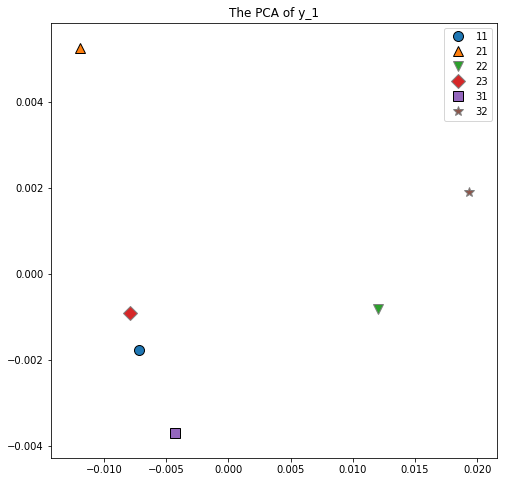

In [214]:
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components = 2)

pca_Analysis_imf_1_y_1_pd_FFT_scaled = pca.fit_transform(Analysis_imf_1_y_1_pd_FFT_scaled.T)

plt.figure(figsize = (8, 8))
target = [0, 1, 2, 3, 4, 5]
mglearn.discrete_scatter(pca_Analysis_imf_1_y_1_pd_FFT_scaled[ : , 0], pca_Analysis_imf_1_y_1_pd_FFT_scaled[:, 1],target )
#plt.legend(['new', 'normal', 'old'], loc = 'best')
plt.legend(['11', '21', '22', '23', '31', '32'], loc = 'best')
plt.title('The PCA of y_1')

### Z_1

Text(0.5, 1.0, 'The hist of imf_2 in z_1')

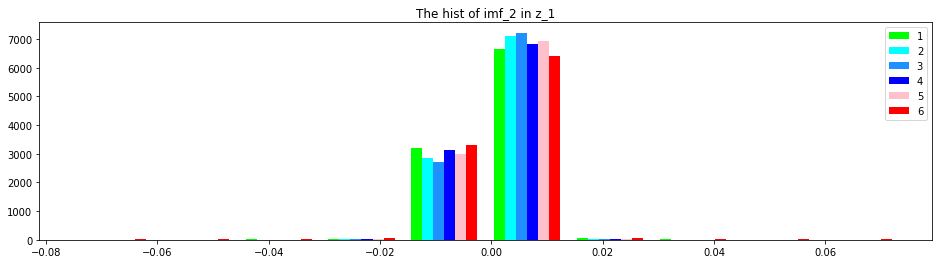

In [225]:
plt.figure(figsize=(16,4))
plt.hist(imf_2_z_1, color = ['lime', 'cyan', 'dodgerblue', 'blue', 'pink', 'red'])
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')
plt.title('The hist of imf_2 in z_1')

In [202]:
#时域的特征计算
Analysis_imf_1_z_1 = Stats_Analysis(imf_1_z_1)
index_name = ['峰值', '能量', '均值', '标准差', '方差', '均方根', '偏度', '偏度P', '峰度', 
              '峰度P', '正态性', '正态性P', 
              '波形因子', '峰值因子', '脉冲因子', '裕度']
column_name = ['No. 0', 'No. 1', 'No. 2', 'No. 3', 'No. 4', 'No. 5']
Analysis_imf_1_z_1_pd = pd.DataFrame(Analysis_imf_1_z_1,index = index_name, columns = column_name)
Analysis_imf_1_z_1_pd#.round(decimals=4)

,No. 0,No. 1,No. 2,No. 3,No. 4,No. 5
峰值,1.741129e-02,0.012530,8.725730e-03,1.294398e-02,1.080449e-02,1.271793e-02
能量,4.010205e+01,43.539576,2.268817e+01,3.955583e+01,3.166016e+01,3.221825e+01
均值,1.046859e-05,0.000039,-1.336920e-06,4.658218e-06,-2.030483e-06,1.915804e-05
标准差,4.813998e-03,0.004989,2.769655e-03,4.706239e-03,3.819373e-03,3.944338e-03
方差,2.317457e-05,0.000025,7.670988e-06,2.214868e-05,1.458761e-05,1.555780e-05
均方根,4.814009e-03,0.004989,2.769655e-03,4.706241e-03,3.819373e-03,3.944384e-03
偏度,-8.214419e-01,-2.578568,2.855116e-01,1.024534e-01,3.798824e-01,-4.662276e-01
偏度P,4.113946e-01,0.009921,7.752522e-01,9.183968e-01,7.040327e-01,6.410526e-01
峰度,-2.089641e+01,-75.991895,-1.383219e+01,-2.943932e+01,-1.938563e+01,-1.159416e+01
峰度P,5.772396e-97,0.000000,1.629878e-43,1.724669e-190,1.020575e-83,4.411569e-31


Text(0.5, 1.0, 'The Feature of z_1')

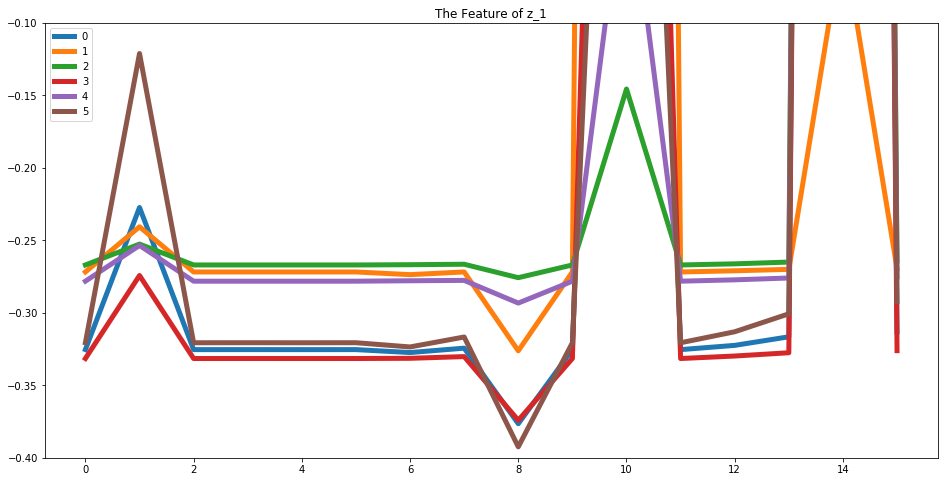

In [216]:
#标准化
from sklearn.preprocessing import StandardScaler
Analysis_imf_1_z_1_pd_scaled = StandardScaler().fit_transform(Analysis_imf_1_z_1_pd)#.reshape(-1, 1))
plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_1_z_1_pd_scaled, lw = 5)
plt.legend(['0', '1', '2', '3', '4', '5'], loc = 'best')
plt.ylim(-0.4, -0.1)
plt.title('The Feature of z_1')

Text(0.5, 1.0, 'The PCA of z_1')

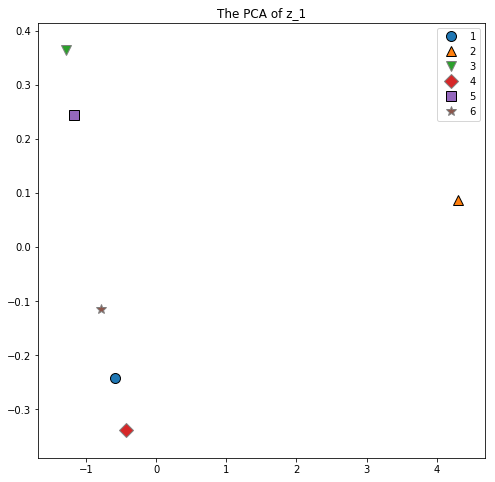

In [213]:
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components = 2)

pca_Analysis_imf_1_z_1_pd_scaled = pca.fit_transform(Analysis_imf_1_z_1_pd_scaled.T)

plt.figure(figsize = (8, 8))
target = [0, 1, 2, 3, 4, 5]
mglearn.discrete_scatter(pca_Analysis_imf_1_z_1_pd_scaled[ : , 0], pca_Analysis_imf_1_z_1_pd_scaled[:, 1],target )
#plt.legend(['new', 'normal', 'old'], loc = 'best')
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')
plt.title('The PCA of z_1')

### x_1

#### imf_1 x_1

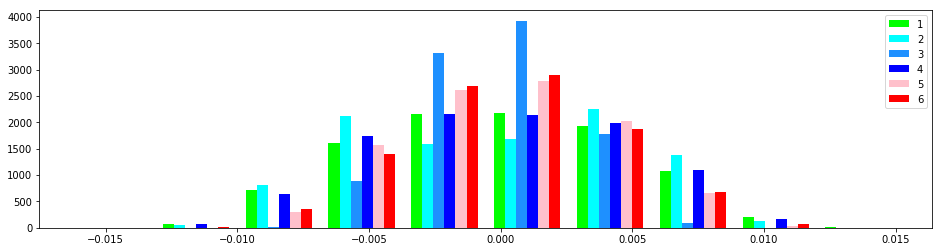

In [222]:
plt.figure(figsize=(16,4))
plt.hist(imf_1_y_1, color = ['lime', 'cyan', 'dodgerblue', 'blue', 'pink', 'red'])
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')

In [207]:
#时域的特征计算
Analysis_imf_1_x_1 = Stats_Analysis(imf_1_x_1)
index_name = ['峰值', '能量', '均值', '标准差', '方差', '均方根', '偏度', '偏度P', '峰度', 
              '峰度P', '正态性', '正态性P', 
              '波形因子', '峰值因子', '脉冲因子', '裕度']
column_name = ['No. 0', 'No. 1', 'No. 2', 'No. 3', 'No. 4', 'No. 5']
Analysis_imf_1_x_1_pd = pd.DataFrame(Analysis_imf_1_x_1,index = index_name, columns = column_name)
Analysis_imf_1_x_1_pd#.round(decimals=4)

,No. 0,No. 1,No. 2,No. 3,No. 4,No. 5
峰值,1.596267e-02,0.011958,8.333833e-03,1.226173e-02,1.149631e-02,1.211675e-02
能量,4.085836e+01,43.743445,2.235455e+01,3.871268e+01,3.172696e+01,3.170382e+01
均值,2.235383e-05,0.000046,1.405447e-05,2.023329e-05,4.790028e-06,2.262872e-06
标准差,4.901826e-03,0.005008,2.715085e-03,4.599048e-03,3.851565e-03,3.917494e-03
方差,2.402789e-05,0.000025,7.371687e-06,2.115125e-05,1.483456e-05,1.534676e-05
均方根,4.901877e-03,0.005009,2.715121e-03,4.599093e-03,3.851568e-03,3.917495e-03
偏度,-1.037683e+00,-2.559406,-3.882814e-01,-2.651778e-01,1.017391e+00,-1.520308e-01
偏度P,2.994177e-01,0.010485,6.978078e-01,7.908725e-01,3.089676e-01,8.791626e-01
峰度,-2.176537e+01,-74.996314,-1.615709e+01,-3.059212e+01,-1.742512e+01,-8.451217e+00
峰度P,4.941057e-105,0.000000,1.012325e-58,1.557922e-205,5.319986e-68,2.882813e-17


Text(0.5, 1.0, 'The Feature of x_1')

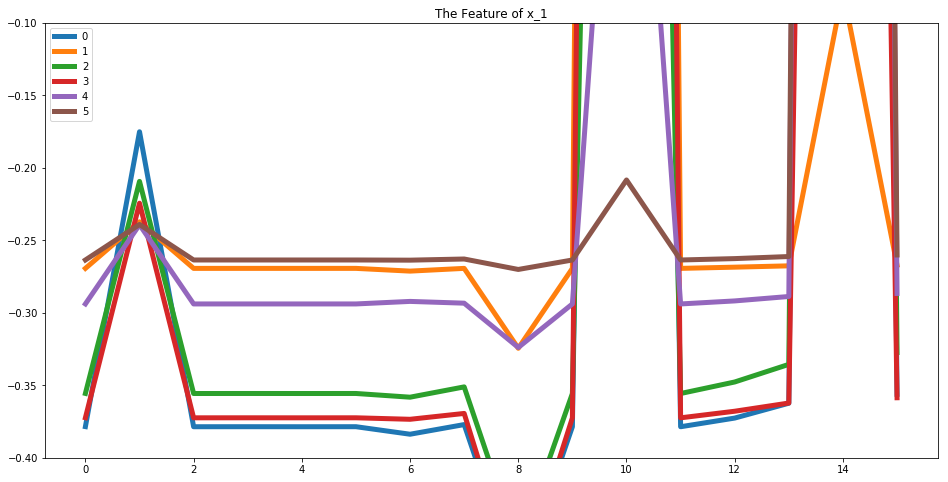

In [215]:
#标准化
from sklearn.preprocessing import StandardScaler
Analysis_imf_1_x_1_pd_scaled = StandardScaler().fit_transform(Analysis_imf_1_x_1_pd)#.reshape(-1, 1))
plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_1_x_1_pd_scaled, lw = 5)
plt.legend(['0', '1', '2', '3', '4', '5'], loc = 'best')
plt.ylim(-0.4, -0.1)
plt.title('The Feature of x_1')

Text(0.5, 1.0, 'The PCA of x_1')

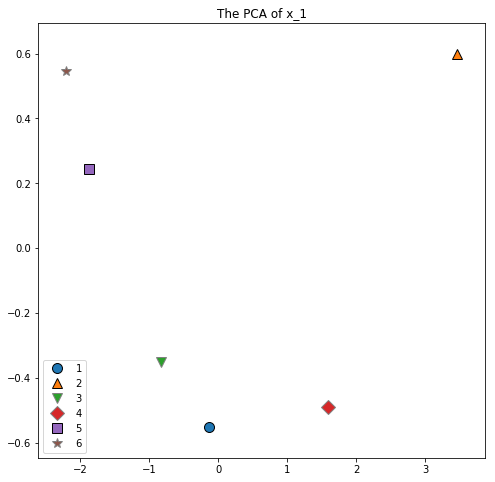

In [212]:
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components = 2)

pca_Analysis_imf_1_x_1_pd_scaled = pca.fit_transform(Analysis_imf_1_x_1_pd_scaled.T)

plt.figure(figsize = (8, 8))
target = [0, 1, 2, 3, 4, 5]
mglearn.discrete_scatter(pca_Analysis_imf_1_x_1_pd_scaled[ : , 0], pca_Analysis_imf_1_x_1_pd_scaled[:, 1],target )
#plt.legend(['new', 'normal', 'old'], loc = 'best')
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')
plt.title('The PCA of x_1')

#### imf_2 x_1

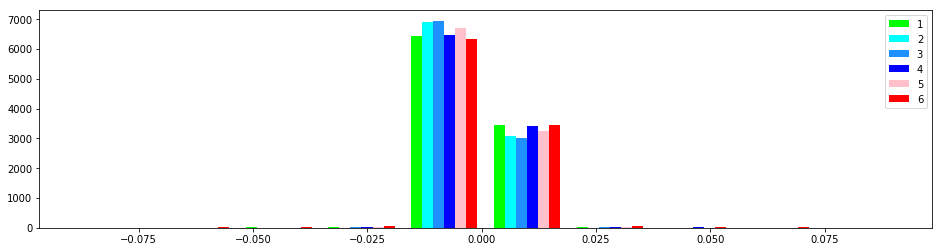

In [238]:
plt.figure(figsize=(16,4))
plt.hist(imf_2_x_1, color = ['lime', 'cyan', 'dodgerblue', 'blue', 'pink', 'red'])
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')

In [229]:
#时域的特征计算
Analysis_imf_2_x_1 = Stats_Analysis(imf_1_x_1)
index_name = ['峰值', '能量', '均值', '标准差', '方差', '均方根', '偏度', '偏度P', '峰度', 
              '峰度P', '正态性', '正态性P', 
              '波形因子', '峰值因子', '脉冲因子', '裕度']
column_name = ['No. 0', 'No. 1', 'No. 2', 'No. 3', 'No. 4', 'No. 5']
Analysis_imf_2_x_1_pd = pd.DataFrame(Analysis_imf_2_x_1,index = index_name, columns = column_name)
Analysis_imf_2_x_1_pd#.round(decimals=4)

,No. 0,No. 1,No. 2,No. 3,No. 4,No. 5
峰值,1.596267e-02,0.011958,8.333833e-03,1.226173e-02,1.149631e-02,1.211675e-02
能量,4.085836e+01,43.743445,2.235455e+01,3.871268e+01,3.172696e+01,3.170382e+01
均值,2.235383e-05,0.000046,1.405447e-05,2.023329e-05,4.790028e-06,2.262872e-06
标准差,4.901826e-03,0.005008,2.715085e-03,4.599048e-03,3.851565e-03,3.917494e-03
方差,2.402789e-05,0.000025,7.371687e-06,2.115125e-05,1.483456e-05,1.534676e-05
均方根,4.901877e-03,0.005009,2.715121e-03,4.599093e-03,3.851568e-03,3.917495e-03
偏度,-1.037683e+00,-2.559406,-3.882814e-01,-2.651778e-01,1.017391e+00,-1.520308e-01
偏度P,2.994177e-01,0.010485,6.978078e-01,7.908725e-01,3.089676e-01,8.791626e-01
峰度,-2.176537e+01,-74.996314,-1.615709e+01,-3.059212e+01,-1.742512e+01,-8.451217e+00
峰度P,4.941057e-105,0.000000,1.012325e-58,1.557922e-205,5.319986e-68,2.882813e-17


Text(0.5, 1.0, 'The Feature of x_1')

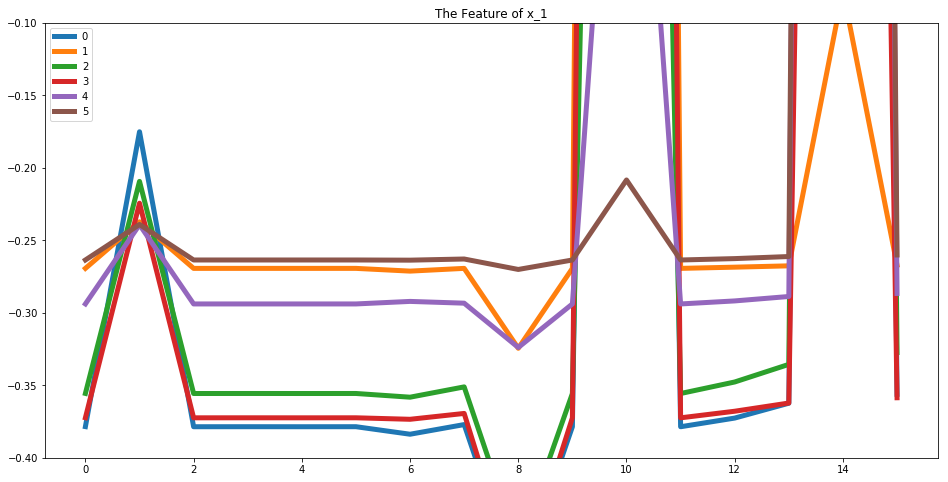

In [230]:
#标准化
from sklearn.preprocessing import StandardScaler
Analysis_imf_2_x_1_pd_scaled = StandardScaler().fit_transform(Analysis_imf_2_x_1_pd)#.reshape(-1, 1))
plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_2_x_1_pd_scaled, lw = 5)
plt.legend(['0', '1', '2', '3', '4', '5'], loc = 'best')
plt.ylim(-0.4, -0.1)
plt.title('The Feature of x_1')

Text(0.5, 1.0, 'The PCA of x_1')

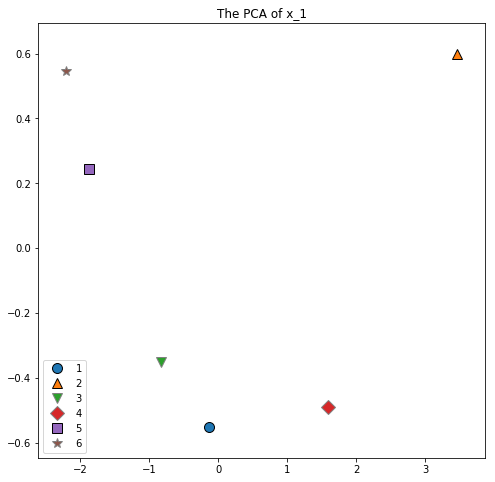

In [231]:
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components = 2)

pca_Analysis_imf_2_x_1_pd_scaled = pca.fit_transform(Analysis_imf_2_x_1_pd_scaled.T)

plt.figure(figsize = (8, 8))
target = [0, 1, 2, 3, 4, 5]
mglearn.discrete_scatter(pca_Analysis_imf_2_x_1_pd_scaled[ : , 0], pca_Analysis_imf_2_x_1_pd_scaled[:, 1],target )
#plt.legend(['new', 'normal', 'old'], loc = 'best')
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')
plt.title('The PCA of x_1')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [255]:
class Time_Domain_Analysis():
    def __init__(self, data):
        self.data = data
        self.color_set = ['lime', 'cyan', 'dodgerblue', 'blue', 'pink', 'red']
        self.legend_name = ['1', '2', '3', '4', '5', '6']
        self.index_name = ['峰值', '能量', '均值', '标准差', '方差', '均方根', '偏度', '偏度P', '峰度', 
              '峰度P', '正态性', '正态性P', 
              '波形因子', '峰值因子', '脉冲因子', '裕度']
        self.column_name = ['No. 0', 'No. 1', 'No. 2', 'No. 3', 'No. 4', 'No. 5']
        self.figsize_set=(16,4)
        
    def draw_hist(self):
        plt.figure(figsize=self.figsize_set)
        plt.hist(self.data, color = self.color_set)
        plt.legend(self.legend_name, loc = 'best')
        
    def time_domain_calculate(self):
        #时域的特征计算
        Analysis_data = Stats_Analysis(self.data)
        Analysis_data_pd = pd.DataFrame(Analysis_data,index = self.index_name, columns = self.column_name)
        return Analysis_data_pd#.round(decimals=4)
    
    def data_scaled(self):
        Analysis_data_pd_scaled = StandardScaler().fit_transform(Analysis_imf_3_x_1_pd)#.reshape(-1, 1))
plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_3_x_1_pd_scaled, lw = 5)
plt.legend(['0', '1', '2', '3', '4', '5'], loc = 'best')
plt.ylim(-0.4, -0.1)
plt.title('The Feature of x_1')
        

In [ ]:
Time_Domain_Analysis(imf_3_x_1).time_domain_calculate()

#### imf_3 x_1

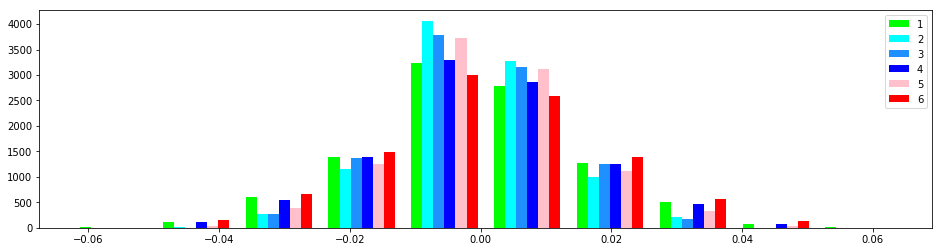

In [239]:
plt.figure(figsize=(16,4))
legend_name = ['1', '2', '3', '4', '5', '6']
plt.hist(imf_3_x_1, color = ['lime', 'cyan', 'dodgerblue', 'blue', 'pink', 'red'])
plt.legend(legend_name, loc = 'best')

In [233]:
#时域的特征计算
Analysis_imf_3_x_1 = Stats_Analysis(imf_1_x_1)
index_name = ['峰值', '能量', '均值', '标准差', '方差', '均方根', '偏度', '偏度P', '峰度', 
              '峰度P', '正态性', '正态性P', 
              '波形因子', '峰值因子', '脉冲因子', '裕度']
column_name = ['No. 0', 'No. 1', 'No. 2', 'No. 3', 'No. 4', 'No. 5']
Analysis_imf_3_x_1_pd = pd.DataFrame(Analysis_imf_3_x_1,index = index_name, columns = column_name)
Analysis_imf_3_x_1_pd#.round(decimals=4)

,No. 0,No. 1,No. 2,No. 3,No. 4,No. 5
峰值,1.596267e-02,0.011958,8.333833e-03,1.226173e-02,1.149631e-02,1.211675e-02
能量,4.085836e+01,43.743445,2.235455e+01,3.871268e+01,3.172696e+01,3.170382e+01
均值,2.235383e-05,0.000046,1.405447e-05,2.023329e-05,4.790028e-06,2.262872e-06
标准差,4.901826e-03,0.005008,2.715085e-03,4.599048e-03,3.851565e-03,3.917494e-03
方差,2.402789e-05,0.000025,7.371687e-06,2.115125e-05,1.483456e-05,1.534676e-05
均方根,4.901877e-03,0.005009,2.715121e-03,4.599093e-03,3.851568e-03,3.917495e-03
偏度,-1.037683e+00,-2.559406,-3.882814e-01,-2.651778e-01,1.017391e+00,-1.520308e-01
偏度P,2.994177e-01,0.010485,6.978078e-01,7.908725e-01,3.089676e-01,8.791626e-01
峰度,-2.176537e+01,-74.996314,-1.615709e+01,-3.059212e+01,-1.742512e+01,-8.451217e+00
峰度P,4.941057e-105,0.000000,1.012325e-58,1.557922e-205,5.319986e-68,2.882813e-17


Text(0.5, 1.0, 'The Feature of x_1')

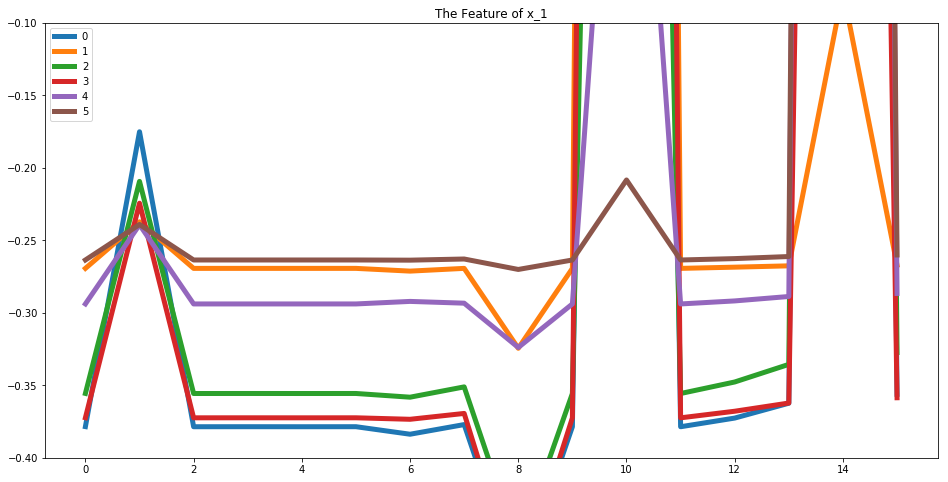

In [235]:
#标准化
from sklearn.preprocessing import StandardScaler
Analysis_imf_3_x_1_pd_scaled = StandardScaler().fit_transform(Analysis_imf_3_x_1_pd)#.reshape(-1, 1))
plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_3_x_1_pd_scaled, lw = 5)
plt.legend(['0', '1', '2', '3', '4', '5'], loc = 'best')
plt.ylim(-0.4, -0.1)
plt.title('The Feature of x_1')

Text(0.5, 1.0, 'The PCA of x_1')

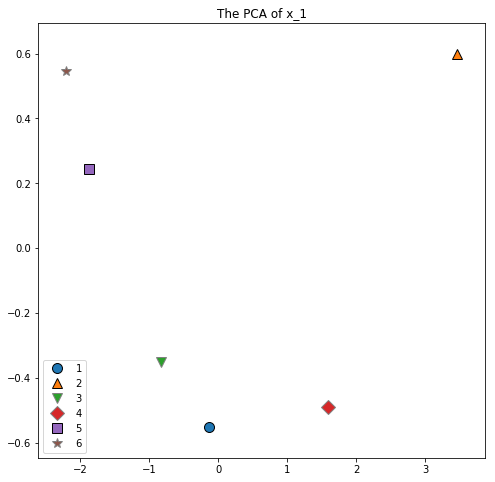

In [236]:
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components = 2)

pca_Analysis_imf_3_x_1_pd_scaled = pca.fit_transform(Analysis_imf_3_x_1_pd_scaled.T)

plt.figure(figsize = (8, 8))
target = [0, 1, 2, 3, 4, 5]
mglearn.discrete_scatter(pca_Analysis_imf_3_x_1_pd_scaled[ : , 0], pca_Analysis_imf_3_x_1_pd_scaled[:, 1],target )
#plt.legend(['new', 'normal', 'old'], loc = 'best')
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')
plt.title('The PCA of x_1')

#### imf_2 x_1

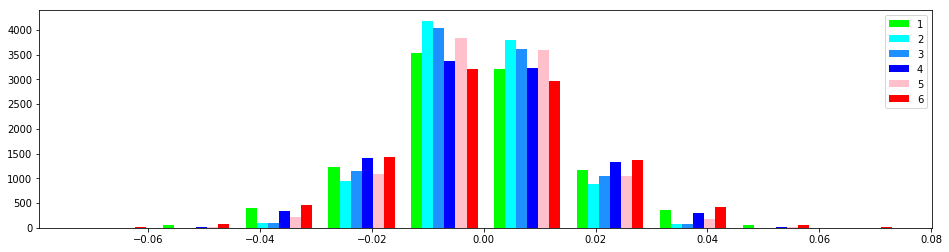

In [232]:
plt.figure(figsize=(16,4))
plt.hist(imf_3_y_1, color = ['lime', 'cyan', 'dodgerblue', 'blue', 'pink', 'red'])
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')

In [233]:
#时域的特征计算
Analysis_imf_3_x_1 = Stats_Analysis(imf_1_x_1)
index_name = ['峰值', '能量', '均值', '标准差', '方差', '均方根', '偏度', '偏度P', '峰度', 
              '峰度P', '正态性', '正态性P', 
              '波形因子', '峰值因子', '脉冲因子', '裕度']
column_name = ['No. 0', 'No. 1', 'No. 2', 'No. 3', 'No. 4', 'No. 5']
Analysis_imf_3_x_1_pd = pd.DataFrame(Analysis_imf_3_x_1,index = index_name, columns = column_name)
Analysis_imf_3_x_1_pd#.round(decimals=4)

,No. 0,No. 1,No. 2,No. 3,No. 4,No. 5
峰值,1.596267e-02,0.011958,8.333833e-03,1.226173e-02,1.149631e-02,1.211675e-02
能量,4.085836e+01,43.743445,2.235455e+01,3.871268e+01,3.172696e+01,3.170382e+01
均值,2.235383e-05,0.000046,1.405447e-05,2.023329e-05,4.790028e-06,2.262872e-06
标准差,4.901826e-03,0.005008,2.715085e-03,4.599048e-03,3.851565e-03,3.917494e-03
方差,2.402789e-05,0.000025,7.371687e-06,2.115125e-05,1.483456e-05,1.534676e-05
均方根,4.901877e-03,0.005009,2.715121e-03,4.599093e-03,3.851568e-03,3.917495e-03
偏度,-1.037683e+00,-2.559406,-3.882814e-01,-2.651778e-01,1.017391e+00,-1.520308e-01
偏度P,2.994177e-01,0.010485,6.978078e-01,7.908725e-01,3.089676e-01,8.791626e-01
峰度,-2.176537e+01,-74.996314,-1.615709e+01,-3.059212e+01,-1.742512e+01,-8.451217e+00
峰度P,4.941057e-105,0.000000,1.012325e-58,1.557922e-205,5.319986e-68,2.882813e-17


Text(0.5, 1.0, 'The Feature of x_1')

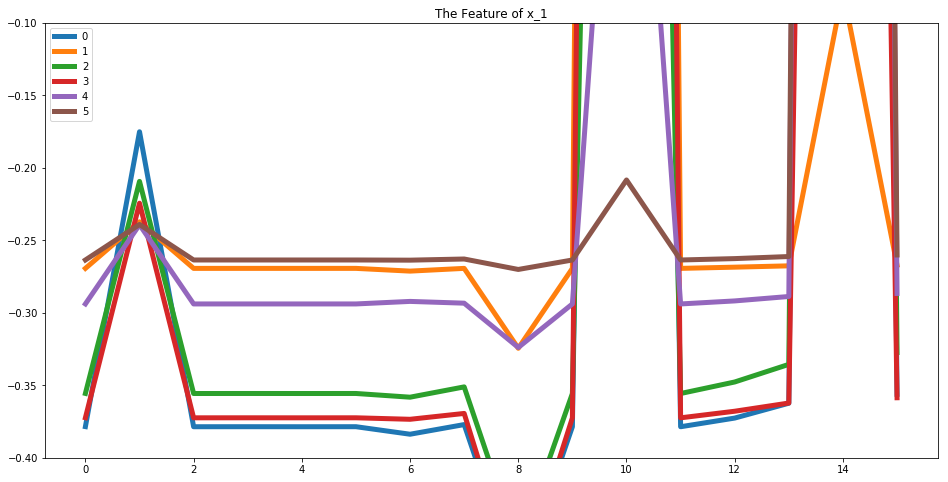

In [235]:
#标准化
from sklearn.preprocessing import StandardScaler
Analysis_imf_3_x_1_pd_scaled = StandardScaler().fit_transform(Analysis_imf_3_x_1_pd)#.reshape(-1, 1))
plt.figure(figsize = (16, 8))
plt.plot(Analysis_imf_3_x_1_pd_scaled, lw = 5)
plt.legend(['0', '1', '2', '3', '4', '5'], loc = 'best')
plt.ylim(-0.4, -0.1)
plt.title('The Feature of x_1')

Text(0.5, 1.0, 'The PCA of x_1')

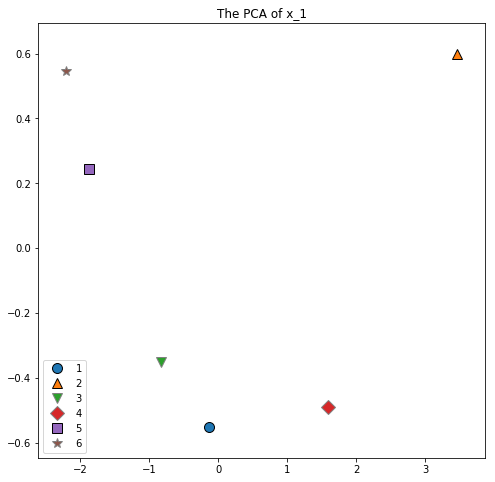

In [236]:
from sklearn.decomposition import PCA
import mglearn
pca = PCA(n_components = 2)

pca_Analysis_imf_3_x_1_pd_scaled = pca.fit_transform(Analysis_imf_3_x_1_pd_scaled.T)

plt.figure(figsize = (8, 8))
target = [0, 1, 2, 3, 4, 5]
mglearn.discrete_scatter(pca_Analysis_imf_3_x_1_pd_scaled[ : , 0], pca_Analysis_imf_3_x_1_pd_scaled[:, 1],target )
#plt.legend(['new', 'normal', 'old'], loc = 'best')
plt.legend(['1', '2', '3', '4', '5', '6'], loc = 'best')
plt.title('The PCA of x_1')

### 其他

#### 时频域特征值

In [174]:
#https://blog.csdn.net/qq_34705900/article/details/88389319

from pandas import Series
import math
pstf_list=[]
def  psfeatureTime(data,p1,p2):
    
    #均值
    #df_mean=data[p1:p2].mean()
    
    #方差
    #df_var=data[p1:p2].var()
    #标准差
    #df_std=data[p1:p2].std()
    
    #均方根
    df_rms=math.sqrt(pow(df_mean,2) + pow(df_std,2))
    #偏度
    #df_skew=data[p1:p2].skew()
    #峭度
    df_kurt=data[p1:p2].kurt()
    sum=0
    for i in range(p1,p2):
        sum+=math.sqrt(abs(data[i]))
    #波形因子
    #df_boxing=df_rms / (abs(data[p1:p2]).mean())
    
    #峰值因子
    #df_fengzhi=(max(data[p1:p2])) / df_rms
    #脉冲因子
    #df_maichong=(max(data[p1:p2])) / (abs(data[p1:p2]).mean())
    #裕度因子
    #df_yudu=(max(data[p1:p2])) / pow((sum/(p2-p1)),2)
    featuretime_list = [df_mean,df_rms,df_skew,df_kurt,df_boxing,df_fengzhi,df_maichong,df_yudu]

(1)数据真实性判断：可以通过excel来观察数据的整体趋势，周期性，波峰波谷，或者用利用拟合技术等手段实现数据的真实性的验证。(2)数据异常值处理：对于NAN数据或者奇异点，可以采取基于拉依达准则的数据异常值处理。关于拉依达准则的原理，大家百度就可以了。我简单说一下就是当样本点的样本偏差大于3倍标准差对该样本点进行处理。(3)数据去噪平滑处理：为了尽可能避免噪声带来的干扰，常用的除噪技术包括,滑动平均滤波，低通高通滤波，中值滤波，卡尔曼滤波，小波阈值滤波等。(4)数据分割：这一项常用的有基于滑动窗口，基于阈值检测，模型匹配等。(5)数据特征提取：分三类：时域特征，频域特征，时频域特征。时域特征包括：最大值，最小值，方差，标准差，RMSE，均值，熵等。频域特征包括：the output of FFT(bias coefficients),光谱分布，FFT系数平方之和等。  时频域特征包括：小波分解，小波包分解重构等。

利用python实现大数据的特征提取

In [181]:
#原文链接：https://blog.csdn.net/Melo0705/article/details/88136227
import pandas as pd
import numpy as np
#Read data
Raw_data=pd.read_excel(r'C:\Users\201810\Desktop\机器学习数据集\1.xls',sheet_name='Sheet1',index_col=None)
Raw_data=Raw_data.values#取值，且转化为二维数组
data=np.array(Raw_data)#二维数组(矩阵) 这里的np.array()是为了下面使用numpy包，转化为nummpy数据标准 ,并不改变维度
(m,n)=Raw_data.shape #矩阵的行数m列数n，返回一个元组
 
def entropy(vector,segnment): #自定义一个求解信息熵的函数，vector为向量，segment分段数值
    x_min=np.min(vector)
    x_max=np.max(vector)
    x_dis=np.abs(x_max-x_min)
    x_lower=x_min
    seg=1.0/segnment
    ternal=x_dis*seg
    list1=[]
    List1=[]
    #
    for i in range(len(vector)):
        if vector[i]>=x_lower+ternal:
            list1.append(vector[i])
    len_list1=len(list1)
    List1.append(len_list1)
    #
    for j in range(1,segnment):
        list1=[]
        for i in range(len(vector)):
            if vector[i]>=x_lower+j*ternal and vector[i]<x_lower+(j+1)*ternal:
                list1.append(vector[i])
        len_list1=len(list1)
        List1.append(len_list1)
    #
    list1=[]
    for i in range(len(vector)):
        if vector[i]>=x_lower+(segnment-1)*ternal :
            list1.append(vector[i])
    len_list1=len(list1)
    List1.append(len_list1)
    List1=List1/np.sum(List1) 
    
    y=0
    Y=[]
    for i in range(segnment):
        if List1[i]==0:
            y=0
            Y.append(y)
        else:
            y=-List1[i]*np.log2(List1[i]);
            Y.append(y)
    result=np.sum(Y) 
    return result
 
#数据预处理
data_feature=np.zeros(shape=(6,n)) #特征二维数组(矩阵)的初始化 np.zeros(shape=(行，列))
for i in range(n):
    data_ave=np.mean(data[:,i])
    data_std=np.std(data[:,i],ddof=1)
    for j in range(1,m-1): #基于拉伊达准则的数据异常值处理
        if np.abs(data[j,i])>3*data_std:
            data[j,i]=0.5*(data[j-1][i]+data[j+1][i])
        else:
           continue
    data_ave=np.mean(data[:,i]) #均值
    data_std=np.std(data[:,i]) #标准差
    data_max=np.max(data[:,i]) #最大值
    data_min=np.min(data[:,i]) #最小值
    data_energy=np.sum(np.abs(data[:,i])) #能量：数据绝对值之和表示能量
    data_normal = (data[:,i]-data_min) / (data_max-data_min)#数据归一化(0,1)
    segnment=int(0.5*m);
    data_etropy=entropy(data_normal,segnment)#信息熵
    data_feature[:,i]=[data_ave,data_std,data_max,data_min,data_energy,data_etropy]#特征二维数组
 
#写入数据
data_f = pd.DataFrame(data_feature)#写入数据
data_f.columns = ['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz']#列标题
data_f.index = ['ave','std','max','min','energy','entropy']#行标题
writer = pd.ExcelWriter(r'C:\Users\201810\Desktop\机器学习数据集\f1.xls')#写入路径
data_f.to_excel(writer,'data_feature',float_format='%.2f') # data_feature为sheet名，float_format 数值精度
writer.save()#保存




#### 绘制直方图

([array([   4.,  125.,  961., 1902., 2263., 2244., 1804.,  636.,   58.,
            3.]),
  array([   0.,   77., 1192., 2131., 1667., 2001., 2275.,  637.,   20.,
            0.]),
  array([   0.,    0.,   43., 1540., 3917., 3573.,  921.,    6.,    0.,
            0.]),
  array([2.000e+00, 9.300e+01, 8.740e+02, 1.937e+03, 2.384e+03, 2.255e+03,
         1.830e+03, 5.930e+02, 3.200e+01, 0.000e+00]),
  array([   0.,   12.,  497., 1928., 2910., 2851., 1540.,  255.,    7.,
            0.]),
  array([3.000e+00, 4.100e+01, 5.150e+02, 1.817e+03, 3.053e+03, 2.759e+03,
         1.463e+03, 3.290e+02, 1.900e+01, 1.000e+00])],
 array([-0.0163691 , -0.01301178, -0.00965446, -0.00629714, -0.00293981,
         0.00041751,  0.00377483,  0.00713215,  0.01048948,  0.0138468 ,
         0.01720412]),
 <a list of 6 Lists of Patches objects>)

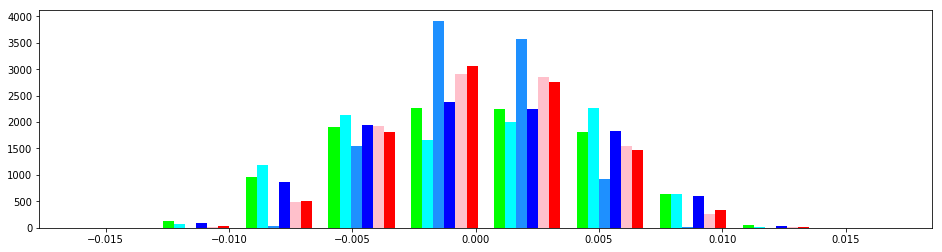

In [141]:
plt.figure(figsize=(16,4))
plt.hist(imf_1_y_1, color = ['lime', 'cyan', 'dodgerblue', 'blue', 'pink', 'red'])

#### 标准化

In [148]:
from sklearn.preprocessing import StandardScaler
imf_1_y_1_scaled = StandardScaler().fit_transform(imf_1_y_1)#.reshape(-1, 1))

#### PCA

In [422]:
Analysis_imf_1_y_1_pd.head()

,0,1,2,3,4,5
峰值,0.017204,0.012019,0.007896,0.012290,0.011630,0.013931
能量,40.466970,43.742565,22.503318,39.178220,31.839619,32.035494
均值,0.000014,0.000033,0.000009,0.000027,0.000003,0.000002
标准差（方差的根号）,0.004845,0.005011,0.002735,0.004678,0.003856,0.003957
方差,0.000023,0.000025,0.000007,0.000022,0.000015,0.000016


#### 相关性分析

In [178]:
Analysis_imf_1_y_1_pd.corr(method = 'pearson')

,0,1,2,3,4,5
0,1.000000,0.999998,0.999988,1.000000,1.000000,0.999978
1,0.999998,1.000000,0.999981,0.999998,0.999996,0.999969
2,0.999988,0.999981,1.000000,0.999988,0.999991,0.999998
3,1.000000,0.999998,0.999988,1.000000,0.999999,0.999977
4,1.000000,0.999996,0.999991,0.999999,1.000000,0.999982
5,0.999978,0.999969,0.999998,0.999977,0.999982,1.000000


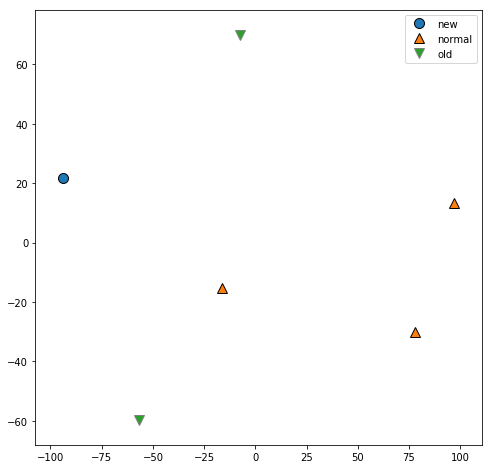

In [427]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_imf_1_y_1_scaled = pca.fit_transform(imf_1_y_1_scaled)

import mglearn
plt.figure(figsize = (8, 8))
target = [0, 1, 1, 1, 2, 2]
mglearn.discrete_scatter(imf_1_y_1_pca[ : , 0], imf_1_y_1_pca[:, 1],target)
plt.legend(['new', 'normal', 'old'], loc = 'best')

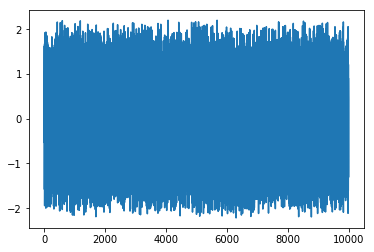

In [147]:
plt.plot(b[0])
#plt.plot(data_x_0_EMD[0])

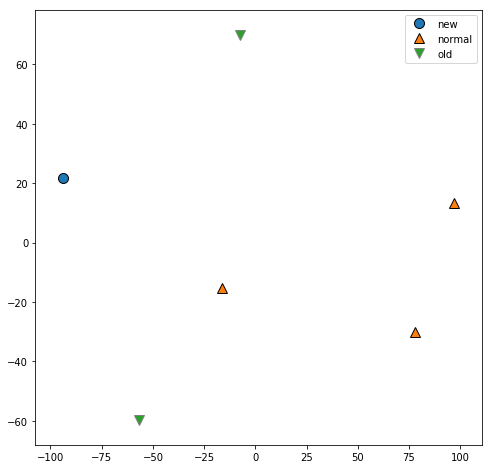

In [168]:
from sklearn.datasets import load_breast_cancer

In [162]:
cancer = load_breast_cancer()
a = cancer.data
b = cancer.target
b.shape
#pd.DataFrame(a)
b

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## FFT滤波降噪

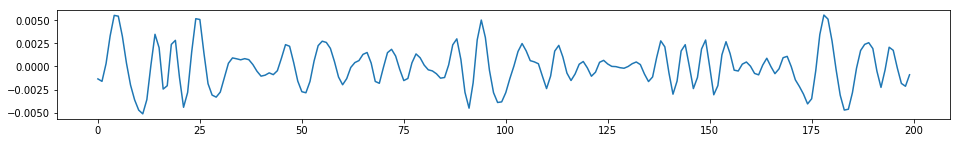

In [61]:
plt.figure(figsize = (16, 2))
plt.plot(x_0_new_EEMD[1][1])

#### FFT

In [62]:
amps_x_0_new_EEMD_1_1 = np.abs(fftpack.fftshift(fftpack.rfft(x_0_new_EEMD[1][1])))

#### 去除小于最高频率1%的频率

In [67]:
amps_x_0_new_EEMD_1_1[ amps_x_0_new_EEMD_1_1 < 0.01 * amps_x_0_new_EEMD_1_1.max()] = 0

#### 降噪后的曲线

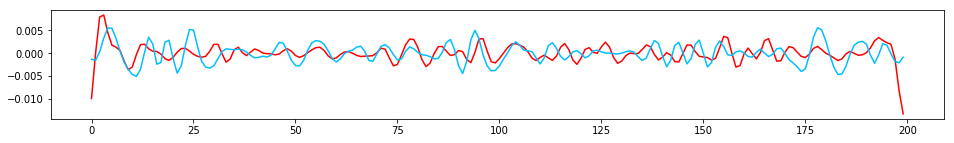

In [70]:
plt.figure(figsize = (16, 2))
plt.plot (-fftpack.irfft(fftpack.ifftshift(amps_x_0_new_EEMD_1_1)), color = 'red')
plt.plot(x_0_new_EEMD[1][1], color = 'deepskyblue')

# Anasys

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()

#### 每个IMF值

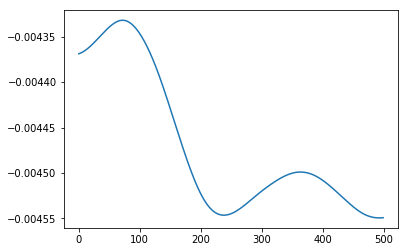

In [42]:
plt.plot(x_0_new_EEMD[1][6])

## 创建矩阵

#### 创建空矩阵

#### 创建赋值矩阵

In [40]:
def IMF_Analysis(data):
    row = data[0]
    line = np.size(data[1][0])
    matrix = [None]*row
    for i in range(row):
        matrix[i] = data[1][i]
        
    return matrix

#### 将IMF封装进矩阵

In [41]:
x_0_new_IMF_analysis = IMF_Analysis(x_0_new_EEMD)
x_0_old_IMF_analysis = IMF_Analysis(x_0_old_EEMD)
y_0_new_IMF_analysis = IMF_Analysis(y_0_new_EEMD)
y_0_old_IMF_analysis = IMF_Analysis(y_0_old_EEMD)
z_0_new_IMF_analysis = IMF_Analysis(z_0_new_EEMD)
z_0_old_IMF_analysis = IMF_Analysis(z_0_old_EEMD)

x_1_new_IMF_analysis = IMF_Analysis(x_1_new_EEMD)
x_1_old_IMF_analysis = IMF_Analysis(x_1_old_EEMD)
y_1_new_IMF_analysis = IMF_Analysis(y_1_new_EEMD)
y_1_old_IMF_analysis = IMF_Analysis(y_1_old_EEMD)
z_1_new_IMF_analysis = IMF_Analysis(z_1_new_EEMD)
z_1_old_IMF_analysis = IMF_Analysis(z_1_old_EEMD)

In [42]:
row = x_0_new_EEMD[0]
line = np.size(x_0_new_EEMD[1][0])

data_x_0_EMD = [None]*row
for i in range(row):
    data_x_0_EMD[i] = x_0_new_EEMD[1][i]#.reshape(-1, 1)

# 分析

# 数据预处理

### 无量纲化

#### 标准化

In [123]:
from sklearn.preprocessing import StandardScaler
b = StandardScaler().fit_transform(data_x_0_EMD[0])#.reshape(-1, 1))

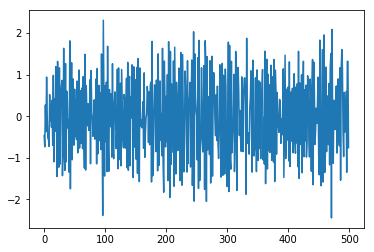

In [124]:
plt.plot(b)
#plt.plot(data_x_0_EMD[0])

#### 归一化

In [125]:
from sklearn.preprocessing import MinMaxScaler
c = MinMaxScaler().fit_transform(data_x_0_EMD[0])

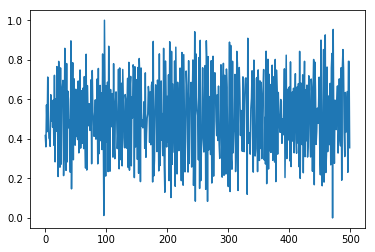

In [126]:
plt.plot(c)

#### L2归一化

In [127]:
from sklearn.preprocessing import Normalizer
d = Normalizer().fit_transform(data_x_0_EMD[0])

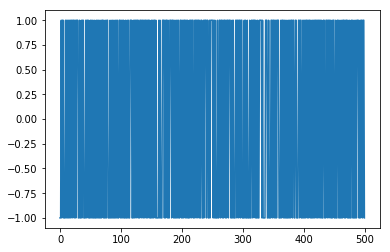

In [90]:
plt.plot(d)

### 对定量特征二值化
定量特征二值化的核心在于设定一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0

In [10]:
from sklearn.preprocessing import Binarizer

#二值化，阈值设置为3，返回值为二值化后的数据
yuzhi = Binarizer(threshold=3).fit_transform(iris.data)

### 对定性特征哑编码
由于IRIS数据集的特征皆为定量特征，故使用其目标值进行哑编码（实际上是不需要的）。使用preproccessing库的OneHotEncoder类对数据进行哑编码的代码如下：

In [12]:
from sklearn.preprocessing import OneHotEncoder

#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
OneHotEncoder().fit_transform(iris.target.reshape((-1,1)))

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

#### 缺失值计算
由于IRIS数据集没有缺失值，故对数据集新增一个样本，4个特征均赋值为NaN，表示数据缺失。

In [17]:
from numpy import vstack, array, nan
from sklearn.preprocessing import Imputer

#缺失值计算，返回值为计算缺失值后的数据
#参数missing_value为缺失值的表示形式，默认为NaN
#参数strategy为缺失值填充方式，默认为mean（均值）
queshizhi = vstack((array([nan, nan, nan, nan]), iris.data))
queshizhijisuan = Imputer().fit_transform(queshizhi)

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### 数据变换
常见的数据变换有基于多项式的、基于指数函数的、基于对数函数的。4个特征，度为2的多项式转换公式如下：https://www.cnblogs.com/jasonfreak/p/5448385.html

In [18]:
from sklearn.preprocessing import PolynomialFeatures
#多项式转换
#参数degree为度，默认值为2
PolynomialFeatures().fit_transform(iris.data)

array([[ 1.  ,  5.1 ,  3.5 , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.9 ,  3.  , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.7 ,  3.2 , ...,  1.69,  0.26,  0.04],
       ...,
       [ 1.  ,  6.5 ,  3.  , ..., 27.04, 10.4 ,  4.  ],
       [ 1.  ,  6.2 ,  3.4 , ..., 29.16, 12.42,  5.29],
       [ 1.  ,  5.9 ,  3.  , ..., 26.01,  9.18,  3.24]])

基于单变元函数的数据变换可以使用一个统一的方式完成

In [19]:
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer

#自定义转换函数为对数函数的数据变换
#第一个参数是单变元函数
FunctionTransformer(log1p).fit_transform(iris.data)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[1.80828877, 1.5040774 , 0.87546874, 0.18232156],
       [1.77495235, 1.38629436, 0.87546874, 0.18232156],
       [1.74046617, 1.43508453, 0.83290912, 0.18232156],
       [1.7227666 , 1.41098697, 0.91629073, 0.18232156],
       [1.79175947, 1.5260563 , 0.87546874, 0.18232156],
       [1.85629799, 1.58923521, 0.99325177, 0.33647224],
       [1.7227666 , 1.48160454, 0.87546874, 0.26236426],
       [1.79175947, 1.48160454, 0.91629073, 0.18232156],
       [1.68639895, 1.36097655, 0.87546874, 0.18232156],
       [1.77495235, 1.41098697, 0.91629073, 0.09531018],
       [1.85629799, 1.54756251, 0.91629073, 0.18232156],
       [1.75785792, 1.48160454, 0.95551145, 0.18232156],
       [1.75785792, 1.38629436, 0.87546874, 0.09531018],
       [1.66770682, 1.38629436, 0.74193734, 0.09531018],
       [1.91692261, 1.60943791, 0.78845736, 0.18232156],
       [1.90210753, 1.68639895, 0.91629073, 0.33647224],
       [1.85629799, 1.58923521, 0.83290912, 0.33647224],
       [1.80828877, 1.5040774 ,

In [95]:
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer

#自定义转换函数为对数函数的数据变换
#第一个参数是单变元函数
FunctionTransformer(log1p).fit_transform(iris.data)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([[1.80828877, 1.5040774 , 0.87546874, 0.18232156],
       [1.77495235, 1.38629436, 0.87546874, 0.18232156],
       [1.74046617, 1.43508453, 0.83290912, 0.18232156],
       [1.7227666 , 1.41098697, 0.91629073, 0.18232156],
       [1.79175947, 1.5260563 , 0.87546874, 0.18232156],
       [1.85629799, 1.58923521, 0.99325177, 0.33647224],
       [1.7227666 , 1.48160454, 0.87546874, 0.26236426],
       [1.79175947, 1.48160454, 0.91629073, 0.18232156],
       [1.68639895, 1.36097655, 0.87546874, 0.18232156],
       [1.77495235, 1.41098697, 0.91629073, 0.09531018],
       [1.85629799, 1.54756251, 0.91629073, 0.18232156],
       [1.75785792, 1.48160454, 0.95551145, 0.18232156],
       [1.75785792, 1.38629436, 0.87546874, 0.09531018],
       [1.66770682, 1.38629436, 0.74193734, 0.09531018],
       [1.91692261, 1.60943791, 0.78845736, 0.18232156],
       [1.90210753, 1.68639895, 0.91629073, 0.33647224],
       [1.85629799, 1.58923521, 0.83290912, 0.33647224],
       [1.80828877, 1.5040774 ,

# 特征选择

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()#导入IRIS数据集
#iris.data#特征矩阵
#iris.target#目标向量

## Filter

#### 方差选择法

In [4]:
from sklearn.feature_selection import VarianceThreshold
 
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
a = VarianceThreshold(threshold=3).fit_transform(iris.data)

#### 相关系数法

In [5]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
#参数k为选择的特征个数
SelectKBest(lambda X, Y: array(map(lambda x:pearsonr(x, Y), X.T)).T, k=2).fit_transform(iris.data, iris.target)

NameError: name 'array' is not defined

# 相关性分析

In [46]:
import pandas as pd

In [47]:
IMF0_new_pd = pd.DataFrame(IMF0_new, columns =['x0', 'y0', 'z0', 'x1', 'y1', 'z1'])
IMF1_new_pd = pd.DataFrame(IMF1_new, columns =['x0', 'y0', 'z0', 'x1', 'y1', 'z1'])

IMF0_old_pd = pd.DataFrame(IMF0_old, columns =['x0', 'y0', 'z0', 'x1', 'y1', 'z1'])
IMF1_old_pd = pd.DataFrame(IMF1_old, columns =['x0', 'y0', 'z0', 'x1', 'y1', 'z1'])

In [76]:
IMF0_new_pd

pandas.core.frame.DataFrame

In [77]:
import seaborn as sns
IMF0_new_pd_corr = IMF0_new_pd.corr(method = 'pearson')
grr = pd.scatter_matrix(IMF0_new_pd.corr)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [63]:
IMF1_new_pd.corr(method = 'pearson')

,x0,y0,z0,x1,y1,z1
x0,1.000000,0.266916,0.269935,0.431545,0.089249,0.340291
y0,0.266916,1.000000,0.425644,0.269632,0.246575,0.346634
z0,0.269935,0.425644,1.000000,0.434226,0.309796,0.456989
x1,0.431545,0.269632,0.434226,1.000000,0.122336,0.397224
y1,0.089249,0.246575,0.309796,0.122336,1.000000,0.585903
z1,0.340291,0.346634,0.456989,0.397224,0.585903,1.000000


In [64]:
IMF0_old_pd.corr(method = 'pearson')

,x0,y0,z0,x1,y1,z1
x0,1.000000,0.984485,0.987555,0.984912,0.972870,0.978374
y0,0.984485,1.000000,0.991566,0.987581,0.986386,0.985778
z0,0.987555,0.991566,1.000000,0.988444,0.985135,0.987553
x1,0.984912,0.987581,0.988444,1.000000,0.984538,0.987006
y1,0.972870,0.986386,0.985135,0.984538,1.000000,0.986529
z1,0.978374,0.985778,0.987553,0.987006,0.986529,1.000000


In [65]:
IMF0_old_pd.corr(method = 'pearson')

,x0,y0,z0,x1,y1,z1
x0,1.000000,0.984485,0.987555,0.984912,0.972870,0.978374
y0,0.984485,1.000000,0.991566,0.987581,0.986386,0.985778
z0,0.987555,0.991566,1.000000,0.988444,0.985135,0.987553
x1,0.984912,0.987581,0.988444,1.000000,0.984538,0.987006
y1,0.972870,0.986386,0.985135,0.984538,1.000000,0.986529
z1,0.978374,0.985778,0.987553,0.987006,0.986529,1.000000


### IMF之间的主成分分析

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
IMF0_new_pd_scaled = StandardScaler().fit_transform(IMF0_new_pd)

NameError: name 'IMF0_new_pd' is not defined

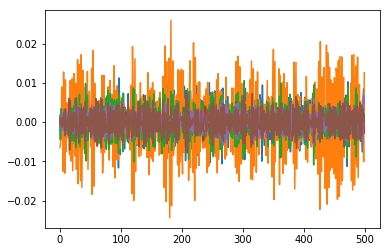

In [68]:
plt.plot(IMF0_new_pd)

In [ ]:
plt.plot(IMF0_new_pd)

# 主成分分析法（PCA）

## GPU的PCA

In [31]:
from sklearn.decomposition import PCA
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def PCA_cuda(data_np, k=2):
    data_cuda = torch.from_numpy(data_np)
    data_mean_cuda = torch.mean(data_cuda, 0)
    data_different_cuda = data_cuda - data_mean_cuda.expand_as(data_cuda)
    
    U, S, V = torch.svd(torch.t(data_different_cuda))

## CPU的PCA

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
#N = N.transpose()
pca_after = pca.fit_transform(pca_before)
np.shape(pca_after)

NameError: name 'pca_before' is not defined

In [228]:
np.shape(iris.target)

(150,)

In [229]:
np.shape(iris.data)

(150, 4)

In [235]:
a = [0] * 125
b = [1] * 125
c = [2] * 125
d = [3] * 125
e = np.hstack((a, b, c, d))
np.shape(e)

(500,)

Text(0.5, 1.0, 'PCA of Vibration')

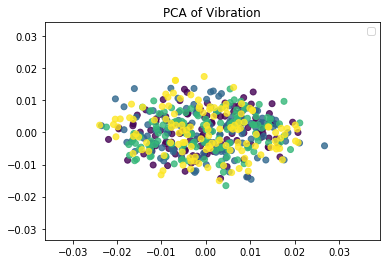

In [236]:
plt.figure()
plt.scatter(pca_answer[:, 0], pca_answer[:, 1], c = e, alpha=.8)
plt.legend()
plt.title('PCA of Vibration')

In [199]:
print('各主成分贡献度:{}'.format(pca.explained_variance_ratio_))

各主成分贡献度:[0.71921691 0.23057488]


In [222]:
print('各主成分贡献度:{}'.format(pca.explained_variance_ratio_))

各主成分贡献度:[0.65122856 0.24550941]


In [ ]:

X_new = pca.inverse_transform(pca_answer)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [237]:
digits.data

NameError: name 'digits' is not defined

In [238]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
#N = N.transpose()
pca_iris = pca.fit_transform(iris.data)
np.shape(pca_iris)

(150, 2)

Text(0.5, 1.0, 'PCA of Vibration')

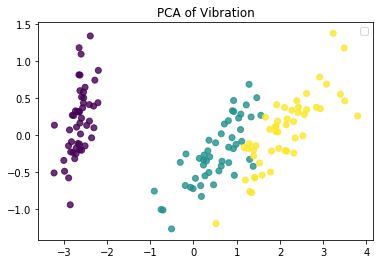

In [239]:
plt.figure()
plt.scatter(pca_iris[:, 0], pca_iris[:, 1], c = iris.target, alpha=.8)
plt.legend()
plt.title('PCA of Vibration')